# The Sparks Foundations

### **GRIP-Data Science and Business Analytics -November 2022 [#GRIPNOV22]**


### **Task-6 : Prediction using Decision Tree Algorithm. (Level - Intermediate)**

### Name : SREEDEVI KATTOOR
Problem Statement :

1.Create the decision tree classifier and visualize it graphically.

2.To check that if we feed any new data to this classifier,it would be able to predict right class accordingly

In [31]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd

# for EDA
import seaborn as sns
import matplotlib.pyplot as plt  

#TO IGNORE WARNINGS
import warnings as wg
wg.filterwarnings("ignore")

In [32]:
#IMPORTING DATA FILE
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\GRIP\Iris.csv")

In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [35]:
#CHECKING THE DATA TYPES
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [36]:
#CHECKING THE NUMBER OF ROWS AND COLUMNS
df.shape

(150, 6)

In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
#FINDING INFORMATION ABOUT DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
#CHECKING THE MISSING VALUES
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There is no null values in the given dataset

In [40]:
#CHECK UNIQUE ENTRIES IN SPECIES COLUMN
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [42]:
#DROPPING THE ID COLUMN
Iris = df.drop(['Id'], axis=1)
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
IrisFreq = pd.crosstab(index=Iris["Species"],  columns="count")      
IrisFreq

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [44]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


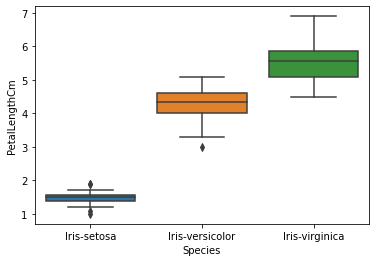

In [45]:
#CHECK OUTLIERS
sns.boxplot(x="Species",y="PetalLengthCm",data=Iris)
plt.show()

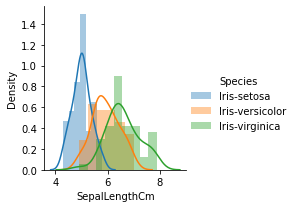

In [46]:
#CHECK THE DISTRIBUTION OF SEPAL LENGTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

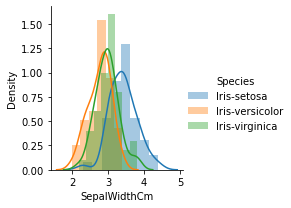

In [47]:
#CHECK THE DISTRIBUTION OF SEPAL WIDTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

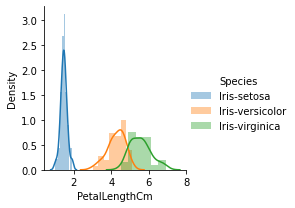

In [48]:
#CHECK THE DISTRIBUTION OF PETALLENGTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

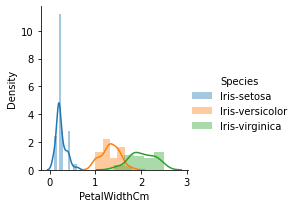

In [49]:
#CHECK THE DISTRIBUTION OF PETAL WIDTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

In [50]:
from sklearn import preprocessing
df['Species']=preprocessing.LabelEncoder().fit_transform(df['Species'])

### Preparing the dataset

In [51]:
X=df.iloc[:,1:5].values
y=df.iloc[:,-1].values

### Splitting the dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Decision Tree Algorithm

In [53]:
#import Decision Tree classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Create model object
dtree=DecisionTreeClassifier(max_depth=5)

In [55]:
# Fit the training model
dtree=dtree.fit(X_train,y_train)

In [56]:
# Predicting the score
dtree.score(X_train,y_train)

1.0

In [57]:
# Test the model using xtest
y_pred=dtree.predict(X_test)

In [58]:
#Making prediction on the dataset
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head() 

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


## Metric Evaluation

### Confusion Matrix and Classification Report

In [60]:

from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

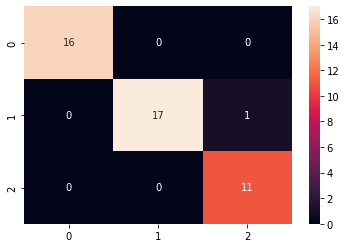

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


### Visualizing Decision Tree

[Text(0.4, 0.9, 'PetalLengthCm <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalWidthCm <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'PetalWidthCm <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'PetalWidthCm <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1,

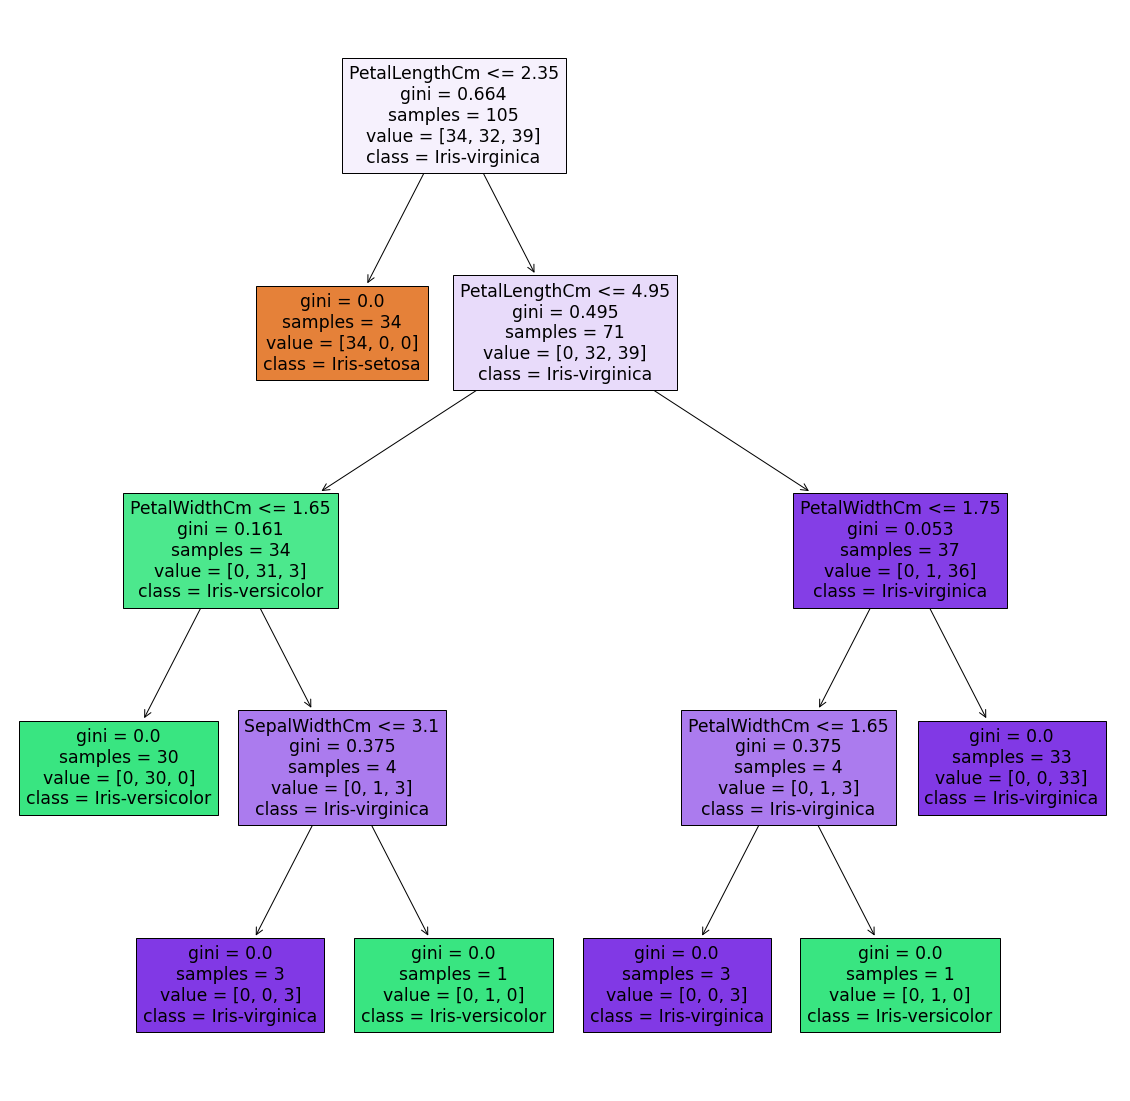

In [62]:
from sklearn import tree
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,feature_names=features,class_names=targets,filled=True,impurity=True)


In [63]:
# Check accuracy ot test model
dtree.score(X_test,y_test)

0.9777777777777777

### This classifier model can predict the species with 97% of accuracy